<>:43: SyntaxWarning: invalid escape sequence '\['
<>:43: SyntaxWarning: invalid escape sequence '\['
/var/folders/y0/33xgrsyx18j1bp7lv_zr_j600000gn/T/ipykernel_37465/3935207544.py:43: SyntaxWarning: invalid escape sequence '\['
  REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\<\>\|@,;]')
/var/folders/y0/33xgrsyx18j1bp7lv_zr_j600000gn/T/ipykernel_37465/3935207544.py:34: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


Raw train size: 12778 | Val: 2739 | Test: 2739
Raw train class counts: [4980 7798]
Test class counts: [1068 1671]
✅ After oversampling → Train size: 15596 | Class counts: [7798 7798]


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 150, 100)       │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_7             │ (None, 150, 100)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ (None, 200)            │       160,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261,001 (1019.54 KB)

 Trainable params: 261,001 (1019.54 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50


E0000 00:00:1763555433.118692 2813285 meta_optimizer.cc:967] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


156/156 ━━━━━━━━━━━━━━━━━━━━ 27s 162ms/step - accuracy: 0.7093 - loss: 0.5545 - val_accuracy: 0.8781 - val_loss: 0.2933
Epoch 2/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 25s 161ms/step - accuracy: 0.8806 - loss: 0.2923 - val_accuracy: 0.8799 - val_loss: 0.2801
Epoch 3/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 25s 162ms/step - accuracy: 0.9027 - loss: 0.2415 - val_accuracy: 0.8879 - val_loss: 0.2736
Epoch 4/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 25s 160ms/step - accuracy: 0.9059 - loss: 0.2282 - val_accuracy: 0.8938 - val_loss: 0.2672
Epoch 5/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 25s 158ms/step - accuracy: 0.9158 - loss: 0.2103 - val_accuracy: 0.8916 - val_loss: 0.2645
Epoch 6/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 25s 157ms/step - accuracy: 0.9252 - loss: 0.1946 - val_accuracy: 0.8919 - val_loss: 0.2688
Epoch 7/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 24s 155ms/step - accuracy: 0.9322 - loss: 0.1791 - val_accuracy: 0.8905 - val_loss: 0.2665
Epoch 8/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 24s 156ms/step - accuracy: 0.9369 - loss: 0.1678 - val

E0000 00:00:1763555657.003054 2813285 meta_optimizer.cc:967] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step

🎯 Final Test Accuracy (on natural distribution): 0.9003

📋 Classification Report (Test Set — Natural Distribution):
              precision    recall  f1-score   support

No Violation       0.88      0.86      0.87      1068
   Violation       0.91      0.92      0.92      1671

    accuracy                           0.90      2739
   macro avg       0.90      0.89      0.89      2739
weighted avg       0.90      0.90      0.90      2739



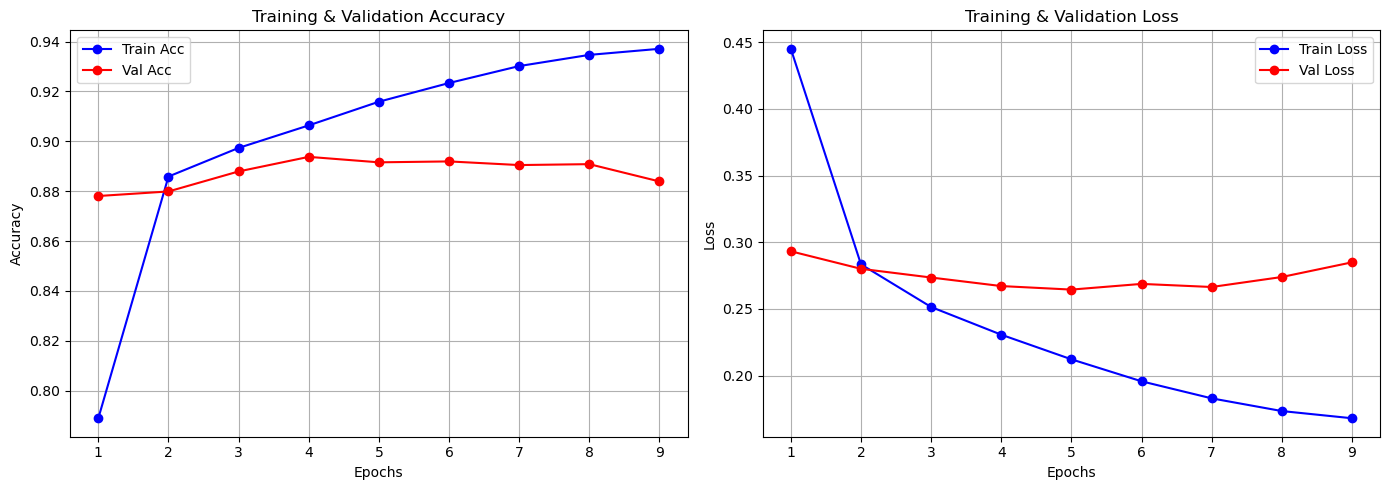

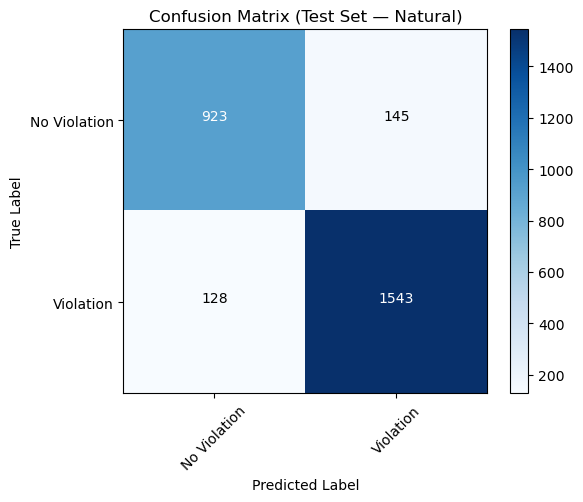

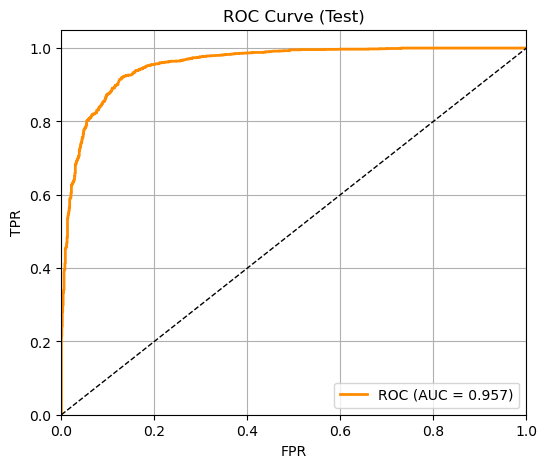

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import itertools
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet as wn
from nltk.stem import WordNetLemmatizer
import nltk
from collections import defaultdict
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler  # Only used on train
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Load & preprocess — same as before
dataset = pd.read_csv('amazonbinaryclassificationdataset_DL.csv', encoding='latin-1')

nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('omw-1.4', quiet=True)

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_url(text):
    return re.sub(r'https?://\S+|www\.\S+', '', text)

def clean_text(text):
    if not isinstance(text, str):
        return ""
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\<\>\|@,;]')
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
    text = strip_html(text)
    text = remove_url(text)
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text)
    return text

# Preprocessing
dataset['comment_Text'] = dataset['comment_Text'].apply(clean_text)
dataset['comment_Text'].dropna(inplace=True)
dataset['comment_Text'] = [word_tokenize(entry.lower()) for entry in dataset['comment_Text']]

tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

for index, entry in enumerate(dataset['comment_Text']):
    Final_words = []
    lemmatizer = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            lemma = lemmatizer.lemmatize(word, tag_map[tag[0]])
            Final_words.append(lemma)
    dataset.loc[index, 'text_final'] = str(Final_words)

# Map labels
dataset['Have_ValueViolation'] = dataset['Have_ValueViolation'].map({'Yes': 1, 'No': 0})

# ✅ STEP 1: Split FIRST → then oversample ONLY train
X = dataset['text_final'].values
y = dataset['Have_ValueViolation'].values

# First: hold out 15% test (stratified)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

# Then: split remaining 85% into train (70%) & val (15%)
X_train_raw, X_val, y_train_raw, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1765, random_state=42, stratify=y_temp
)

print(f"Raw train size: {len(X_train_raw)} | Val: {len(X_val)} | Test: {len(X_test)}")
print(f"Raw train class counts: {np.bincount(y_train_raw)}")
print(f"Test class counts: {np.bincount(y_test)}")  # natural distribution preserved

# ✅ STEP 2: Oversample ONLY the training set
oversampler = RandomOverSampler(random_state=42)
X_train_res, y_train_res = oversampler.fit_resample(
    X_train_raw.reshape(-1, 1), y_train_raw
)
X_train_res = [x[0] for x in X_train_res]  # flatten back to list of strings

print(f"✅ After oversampling → Train size: {len(X_train_res)} | Class counts: {np.bincount(y_train_res)}")

# ✅ STEP 3: Tokenization — fit ONLY on oversampled train
max_words = 1000
max_len = 150

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_res)

def prepare_sequences(texts, tokenizer, max_len):
    seqs = tokenizer.texts_to_sequences(texts)
    return pad_sequences(seqs, maxlen=max_len, padding='post', truncating='post')

X_train_seq = prepare_sequences(X_train_res, tokenizer, max_len)
X_val_seq = prepare_sequences(X_val, tokenizer, max_len)    # ← natural val
X_test_seq = prepare_sequences(X_test, tokenizer, max_len)  # ← natural test

y_train = y_train_res  # already 1D
# y_val, y_test remain original

# ✅ STEP 4: Build & train BiLSTM
def build_BiLSTM_model():
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=100, input_length=max_len),
        SpatialDropout1D(0.2),
        Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.0)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = build_BiLSTM_model()
model.build(input_shape=(None, max_len))  # (batch_size, timesteps)
print(model.summary())

early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

history = model.fit(
    X_train_seq, y_train,
    batch_size=100,
    epochs=50,
    validation_data=(X_val_seq, y_val),  # ← val is NOT oversampled!
    callbacks=[early_stop],
    verbose=1
)

# ✅ STEP 5: Evaluate on natural test set
y_pred_proba = model.predict(X_test_seq).flatten()
y_pred = (y_pred_proba > 0.5).astype(int)

test_acc = accuracy_score(y_test, y_pred)
print(f"\n🎯 Final Test Accuracy (on natural distribution): {test_acc:.4f}")

print("\n📋 Classification Report (Test Set — Natural Distribution):")
print(classification_report(y_test, y_pred, target_names=["No Violation", "Violation"]))

# —— Plotting (same as before) ——
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-o', label='Train Acc')
    plt.plot(epochs, val_acc, 'r-o', label='Val Acc')
    plt.title('Training & Validation Accuracy')
    plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.legend(); plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-o', label='Train Loss')
    plt.plot(epochs, val_loss, 'r-o', label='Val Loss')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.legend(); plt.grid(True)
    plt.tight_layout()
    plt.savefig('BiLSTM_Training and Validation Loss_Curves.png', dpi=200, bbox_inches='tight')
    plt.show()

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix (Test Set — Natural)")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 color="white" if cm[i, j] > thresh else "black",
                 horizontalalignment="center")
    plt.ylabel('True Label'); plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.savefig('BiLSTM_Confusion_matrix.png', dpi=200, bbox_inches='tight')
    plt.show()

def plot_roc_curve(y_true, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlim([0, 1]); plt.ylim([0, 1.05])
    plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC Curve (Test)')
    plt.legend(loc="lower right"); plt.grid(True)
    plt.savefig('BiLSTM_ROC_Curves.png', dpi=200, bbox_inches='tight')
    plt.show()

# Generate plots
plot_history(history)
plot_confusion_matrix(y_test, y_pred, ["No Violation", "Violation"])
plot_roc_curve(y_test, y_pred_proba)